# **K-MEANS CLUSTERING**

Defination:
K-Means Clustering is an unsupervised machine learning algorithm that groups unlabeled data points into K distinct clusters based on their similarity. The algorithm’s objective is to minimize the within-cluster variance by assigning each data point to the cluster with the nearest centroid.

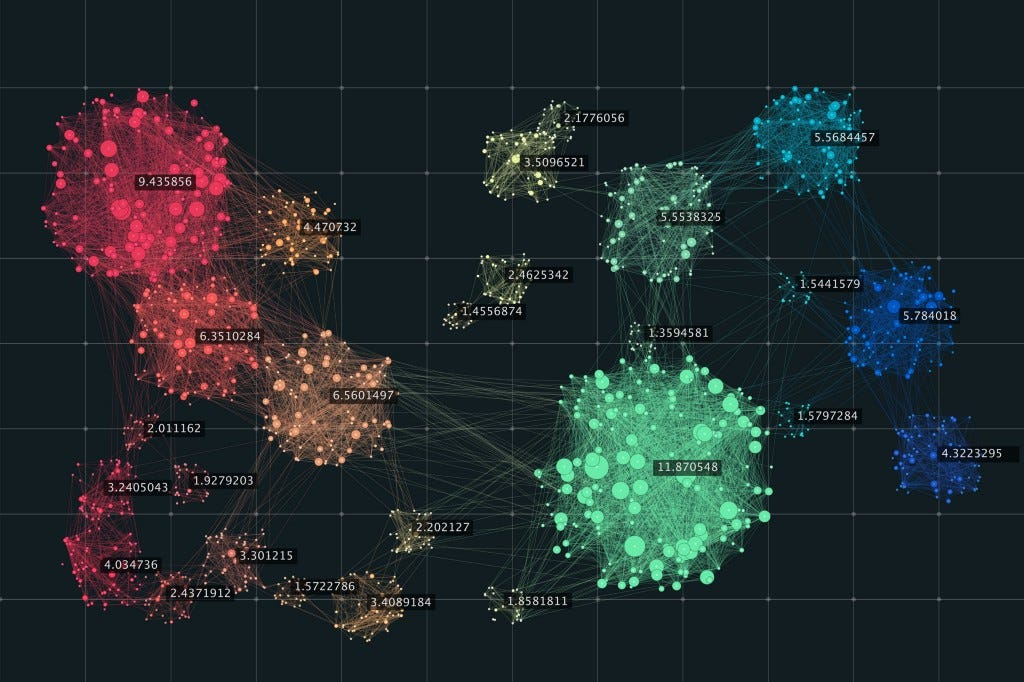

Steps:
- Initialize K centroids randomly within the dataset.
- Calculate the Euclidean distance between each data point and each centroid.
- Assign each data point to the cluster with the nearest centroid.
- Update the centroids by calculating the mean of all data points assigned to each cluster.
- Repeat steps 2-4 until the centroids converge or a stopping criterion is met (e.g.,maximum number of iterations).

Key Points:
- Unsupervised learning: K-Means clustering does not require labeled data; it groups similar data points based on their inherent characteristics.
- Clusters: K-Means identifies K distinct clusters, where each cluster contains data points with similar features.
- Centroids: The mean or average of each cluster, used as a reference point for assigning data points.
- Iterations: The algorithm repeats the process of updating centroids and reassigning data points until convergence or a stopping criterion is reached.

### Importing Required Modules

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

### Importing Dataset

In [2]:
df = pd.read_csv('student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


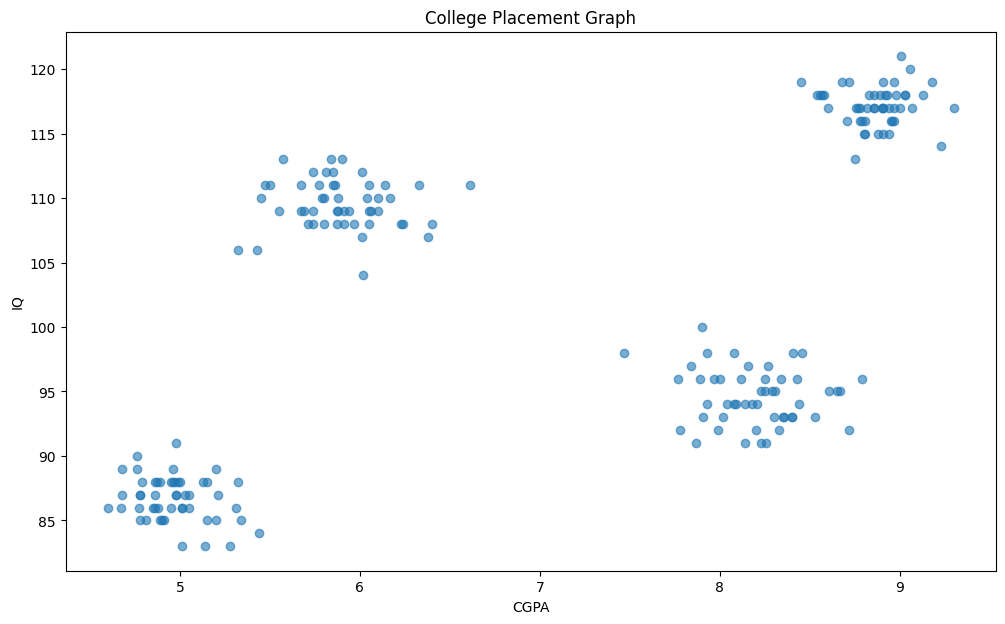

In [3]:
plt.figure(figsize=(12, 7))
plt.scatter(df['cgpa'], df['iq'], alpha=0.6)
plt.title("College Placement Graph")
plt.xlabel("CGPA")
plt.ylabel("IQ")

plt.show()

# **CREATING K-MEANS CLASS FROM SCRATCH**

In [25]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100) -> None:
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters: Number of clusters to form.
        - max_iter: Maximum number of iterations to run.

        Attributes:
        - centroids: Initial centroids, randomly initialized.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    def fit_predict(self, df):
        """
        Fit the KMeans model to the data and predict the clusters.

        Parameters:
        - df: Input data as a pandas DataFrame.

        Returns:
        - cluster_group: Predicted cluster labels for each data point.
        """
        self.n_clusters = self.n_clusters

        # Step 2 -> Randomly Initialize Centroids
        idx = np.random.randint(0, df.shape[0], size=(self.n_clusters))
        self.centroids = np.array(df.iloc[idx, :])

        # Step 3 -> Assign Cluster to Each Data Point
        for _ in range(self.max_iter):
            cluster_group = self.assign_clusters(df)
            old_centroids = self.centroids
            
            # Step 4 -> Update Centroids
            self.centroids = self.move_centroids(df, cluster_group)

            # Stopping Criterion -> Check for convergence
            if (old_centroids == self.centroids).all():
                break
        
        return cluster_group
    
    def assign_clusters(self, df):
        """
        Assign each data point to the nearest centroid.

        Parameters:
        - df: Input data as a pandas DataFrame.

        Returns:
        - cluster_group: Cluster labels for each data point.
        """
        cluster_group = []

        for row in np.array(df):
            all_distances = []

            # Calculate distance to each centroid
            for centroid in self.centroids:
                distance = np.sqrt(np.dot(row - centroid, row - centroid))
                all_distances.append(distance)

            # Determine the closest centroid
            min_distance = min(all_distances)
            index_pos = all_distances.index(min_distance)
            cluster_group.append(index_pos)

        return np.array(cluster_group)
    
    def move_centroids(self, df, cluster_group):
        """
        Update centroids based on the mean of data points in each cluster.

        Parameters:
        - df: Input data as a pandas DataFrame.
        - cluster_group: Cluster labels for each data point.

        Returns:
        - new_centroids: Updated centroids.
        """
        new_centroids = []
        unique_clusters = np.unique(cluster_group)

        for cluster in unique_clusters:
            # Calculate new centroid position as the mean of cluster members
            new_mean = np.array(df[cluster_group == cluster].mean(axis=0))
            new_centroids.append(new_mean)

        return np.array(new_centroids)
    
    def inertia_(self, df, n_clusters):
        """
        Calculate the within-cluster sum of squares (WCSS) or inertia.

        Parameters:
        - df: Input data as a pandas DataFrame.
        - n_clusters: Number of clusters to fit.

        Returns:
        - wcss: Total WCSS for the given number of clusters.
        """
        self.n_clusters = n_clusters
        cluster_groups = self.fit_predict(df)

        wcss = 0
        
        # Calculate WCSS
        for i in range(df.shape[0]):
            cluster_values = self.centroids[cluster_groups[i]]
            wcss += np.sqrt(np.dot(df.iloc[i, :] - cluster_values, df.iloc[i, :] - cluster_values))
        
        return wcss


### Training the Model

In [26]:
kmclt = KMeans(4, 100)

# **ELBOW METHOD**

DEFINATION:
- The Elbow Method is a technique used to determine the optimal number of clusters (k) in K-Means clustering. It involves plotting the explained variation or within-cluster sum of squares against the number of clusters (k) and identifying the “elbow” or bend in the curve, which indicates the optimal value of k.

STEPS:
- Run K-Means clustering for a range of values of k (e.g., 1 to 10).
- Calculate the within-cluster sum of squares (WCSS) or explained variation for each value of k.
- Plot the WCSS against k.
- Identify the point where the curve begins to flatten or bend, indicating that adding more clusters is not significantly improving the model.
- This is the “elbow” point, which corresponds to the optimal value of k.

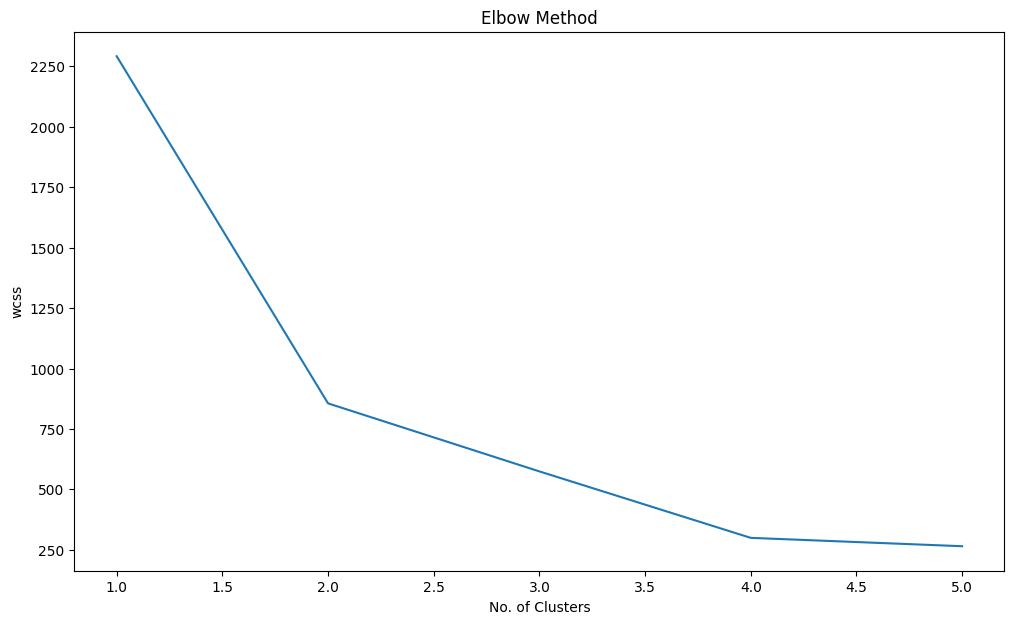

In [49]:
wcss = []
for cluster in range(1, 6):
    wcss.append(kmclt.inertia_(df, cluster))

plt.figure(figsize=(12, 7))
plt.plot(range(1, 6), wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

KEY POINTS:
- The Elbow Method is a heuristic approach and may not always produce a clear or unique optimal value of k.
- The choice of k is sensitive to data preprocessing, feature selection, and scaling.
- Other metrics, such as silhouette score or Calinski-Harabasz index, can be used in conjunction with the Elbow Method to validate the choice of k.
- K-Means clustering is sensitive to data variance, and the Elbow Method may not work well for datasets with varying levels of variance.

### Model Prediction

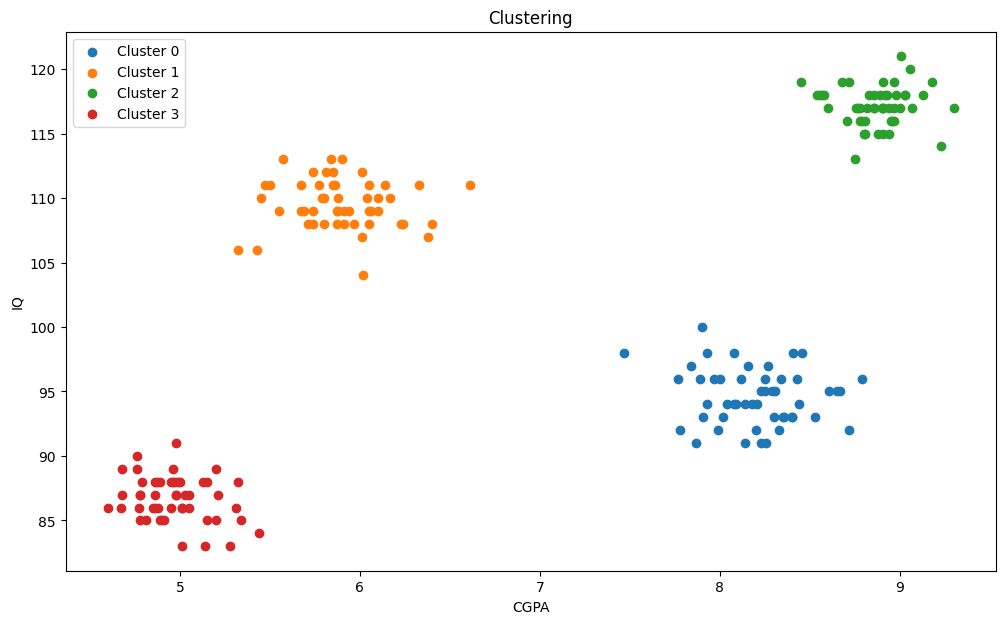

In [40]:
clusters = kmclt.fit_predict(df)

plt.figure(figsize=(12, 7))

plt.scatter(df.iloc[clusters == 0, 0], df.iloc[clusters == 0, 1], label = "Cluster 0")
plt.scatter(df.iloc[clusters == 1, 0], df.iloc[clusters == 1, 1], label = "Cluster 1")
plt.scatter(df.iloc[clusters == 2, 0], df.iloc[clusters == 2, 1], label = "Cluster 2")
plt.scatter(df.iloc[clusters == 3, 0], df.iloc[clusters == 3, 1], label = "Cluster 3")

plt.title("Clustering")
plt.legend()
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.show()

# **SKLEARN INBUILT CLASS - KMeans**

In [50]:
from sklearn.cluster import KMeans

### Model Training and Prediction

In [58]:
kmclt = KMeans(n_clusters=4, max_iter=100)
clusters = kmclt.fit_predict(df)

### Elbow Method

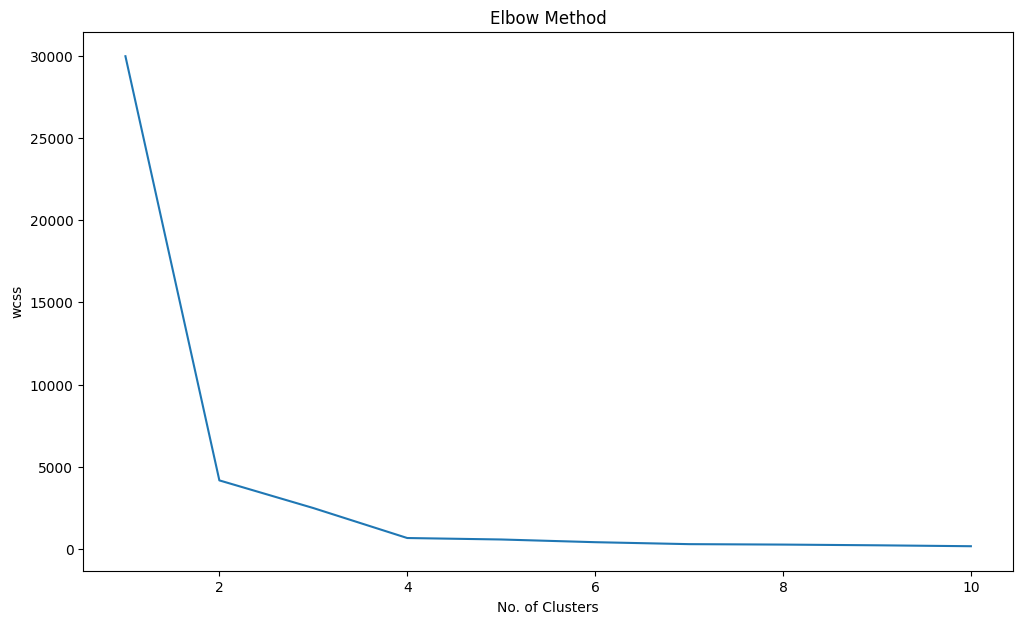

In [61]:
wcss = []

for i in range(10):
    km = KMeans(n_clusters = i + 1)
    km.fit_predict(df)
    wcss.append(km.inertia_)

plt.figure(figsize=(12, 7))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

### Plotting Clusters

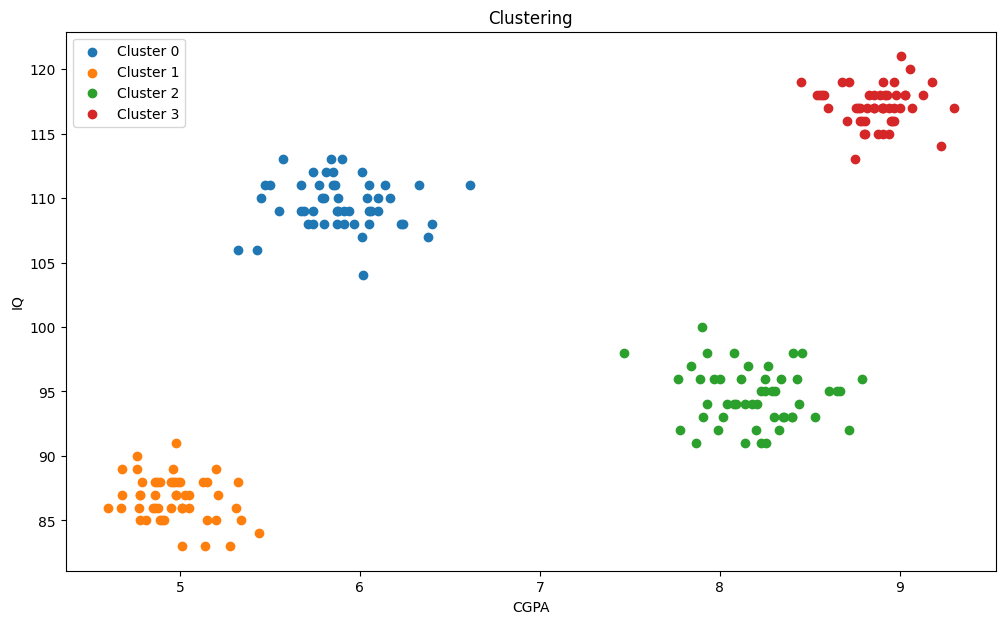

In [59]:
plt.figure(figsize=(12, 7))

plt.scatter(df.iloc[clusters == 0, 0], df.iloc[clusters == 0, 1], label = "Cluster 0")
plt.scatter(df.iloc[clusters == 1, 0], df.iloc[clusters == 1, 1], label = "Cluster 1")
plt.scatter(df.iloc[clusters == 2, 0], df.iloc[clusters == 2, 1], label = "Cluster 2")
plt.scatter(df.iloc[clusters == 3, 0], df.iloc[clusters == 3, 1], label = "Cluster 3")

plt.title("Clustering")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.legend()
plt.show()